In [1]:
import pandas as pd
import seaborn
from matplotlib import pyplot as plt


data = pd.read_csv("C:\\Users\\aleks\\PycharmProjects\\dsml\\dds_ch2_nyt\\nyt1.csv")
data_no_null_age = data[data.Age > 0]
data_no_null_age

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458432,30,0,4,0,1
458433,21,1,2,0,1
458434,61,1,6,0,1
458435,51,0,7,0,1


In [2]:
data.Age.unique()

array([ 36,  73,  30,  49,  47,   0,  46,  16,  52,  21,  57,  31,  40,
        38,  59,  61,  48,  29,  19,  23,  66,  44,  32,  22,  74,  65,
        63,  35,  33,  34,  43,  18,  17,  62,  27,  11,  42,  41,  14,
        64,  24,  26,  39,  71,  45,  28,  83,  79,  67,  51,  60,  58,
        53,  25,  50,  76,  15,  78,  55,  37,  56,  77,  85,  82,  13,
        70,  84,  54,  20,  10,  81,  68,  72,  69,  87,  80,  88,  12,
        86,  75,  89,   9,  96, 102,  98,  90,  99,  91,  92,  95,   8,
        94,  93,  97,   7, 100, 103, 107, 101, 108, 104], dtype=int64)

In [3]:
data.groupby("Age").count()

,Gender,Impressions,Clicks,Signed_In
Age,,,,
0,137106,137106,137106,137106
7,5,5,5,5
8,15,15,15,15
9,48,48,48,48
10,113,113,113,113
...,...,...,...,...
102,2,2,2,2
103,2,2,2,2
104,1,1,1,1


In [4]:
data[data.Age == 0].groupby("Gender").count()

,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,137106,137106,137106,137106


In [17]:
data[data.Age > 0].groupby("Gender").count()

,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,153070,153070,153070,153070
1,168265,168265,168265,168265


In [6]:
data_notnull = data[data.Age > 0]

<AxesSubplot:>

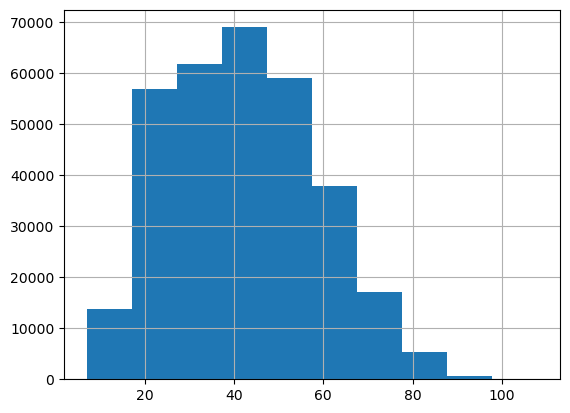

In [7]:
data_notnull.Age.hist()

In [8]:
def count_ageGroup(age: int):
    if age == 18:
        return "18"
    elif age > 18 and age <= 24:
        return "18-24"
    elif age >= 25 and age <= 34:
        return "25-34"
    elif age >= 35 and age <= 44:
        return "35-44"
    elif age >= 45 and age <= 54:
        return "45-54"
    elif age >= 55 and age <= 64:
        return "55-64"
    elif age >= 65:
        return "65+"
    
    
data_notnull['Age_Group'] = data_notnull.Age.apply(lambda row: count_ageGroup(row))
data_groups = data_notnull.groupby("Age_Group", as_index=False).count() 
data_groups

C:\Users\aleks\AppData\Local\Temp\ipykernel_8528\283898601.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_notnull['Age_Group'] = data_notnull.Age.apply(lambda row: count_ageGroup(row))


,Age_Group,Age,Gender,Impressions,Clicks,Signed_In
0,18,5424,5424,5424,5424,5424
1,18-24,35270,35270,35270,35270,35270
2,25-34,58174,58174,58174,58174,58174
3,35-44,70860,70860,70860,70860,70860
4,45-54,64288,64288,64288,64288,64288
5,55-64,44738,44738,44738,44738,44738
6,65+,28753,28753,28753,28753,28753


<AxesSubplot:xlabel='Age_Group', ylabel='Clicks'>

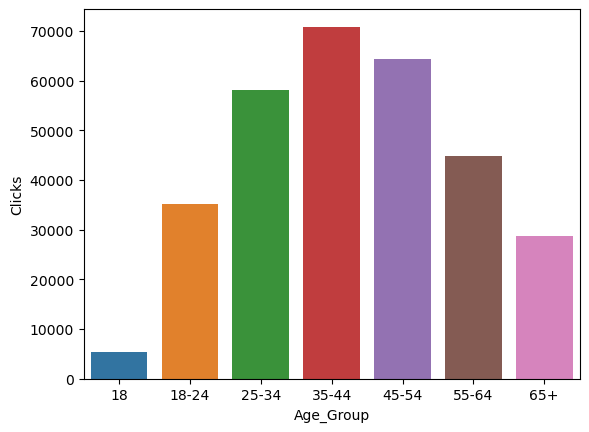

In [9]:
seaborn.barplot(data=data_groups, 
                x=data_groups.Age_Group, 
                y=data_groups.Clicks)

In [10]:
data_signed_in_and_age = data_notnull.groupby(["Age_Group", "Signed_In"], as_index=False).count()
data_signed_in_and_age

,Age_Group,Signed_In,Age,Gender,Impressions,Clicks
0,18,1,5424,5424,5424,5424
1,18-24,1,35270,35270,35270,35270
2,25-34,1,58174,58174,58174,58174
3,35-44,1,70860,70860,70860,70860
4,45-54,1,64288,64288,64288,64288
5,55-64,1,44738,44738,44738,44738
6,65+,1,28753,28753,28753,28753


<AxesSubplot:xlabel='Age_Group', ylabel='Clicks'>

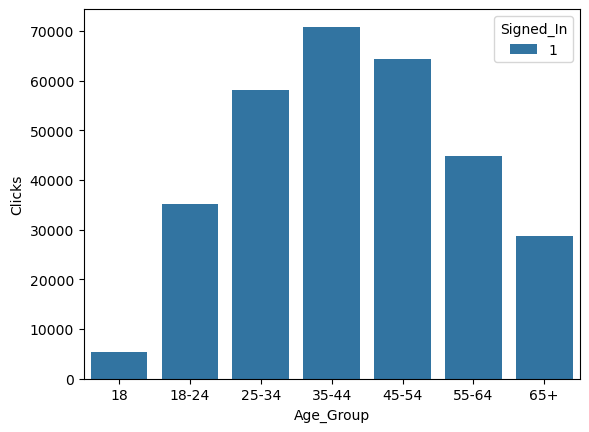

In [11]:
seaborn.barplot(data=data_signed_in_and_age, 
               x=data_signed_in_and_age.Age_Group,
               y=data_signed_in_and_age.Clicks,
               hue=data_signed_in_and_age.Signed_In)

In [12]:
data_gender_age = data_notnull.groupby(["Age_Group", "Gender"], as_index=False).count()
data_gender_age

,Age_Group,Gender,Age,Impressions,Clicks,Signed_In
0,18,0,2532,2532,2532,2532
1,18,1,2892,2892,2892,2892
2,18-24,0,16441,16441,16441,16441
3,18-24,1,18829,18829,18829,18829
4,25-34,0,27216,27216,27216,27216
5,25-34,1,30958,30958,30958,30958
6,35-44,0,33184,33184,33184,33184
7,35-44,1,37676,37676,37676,37676
8,45-54,0,30281,30281,30281,30281
9,45-54,1,34007,34007,34007,34007


<AxesSubplot:xlabel='Age_Group', ylabel='Clicks'>

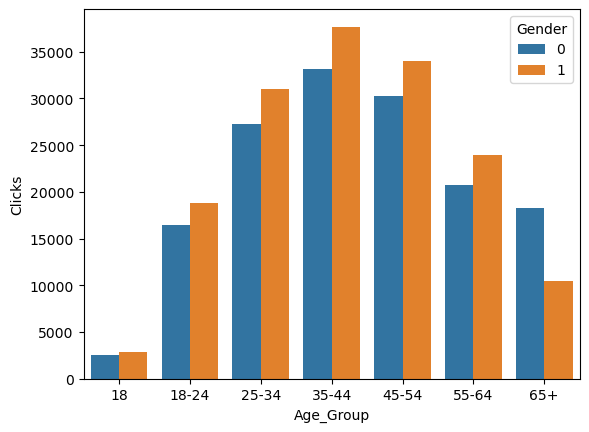

In [13]:
seaborn.barplot(data=data_gender_age,
               x=data_gender_age.Age_Group,
               y=data_gender_age.Clicks,
               hue=data_gender_age.Gender)

In [14]:
data_notnull.groupby(["Gender"]).mean()

,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,43.423336,5.012733,0.073117,1.0
1,40.823701,5.008629,0.069991,1.0


<AxesSubplot:xlabel='Impressions', ylabel='Clicks'>

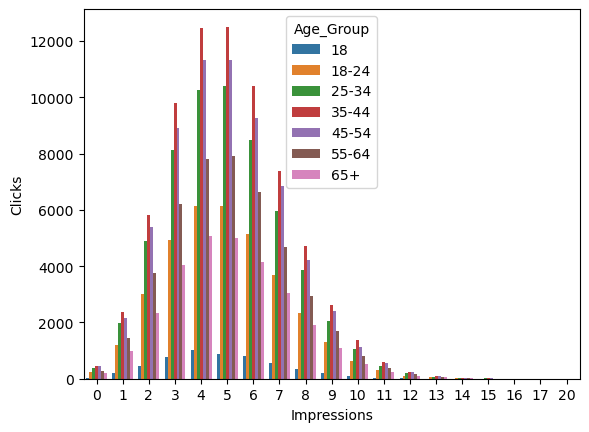

In [19]:
data_age_impressions = data_notnull.groupby(["Age_Group", "Impressions"],as_index=False).count()
seaborn.barplot(data=data_age_impressions,
                x=data_age_impressions.Impressions,
                y=data_age_impressions.Clicks,
                hue=data_age_impressions.Age_Group)